In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


--- Dataset Head (First 5 Rows) ---
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
3        0       setosa  
4        0       setosa  

--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   pet

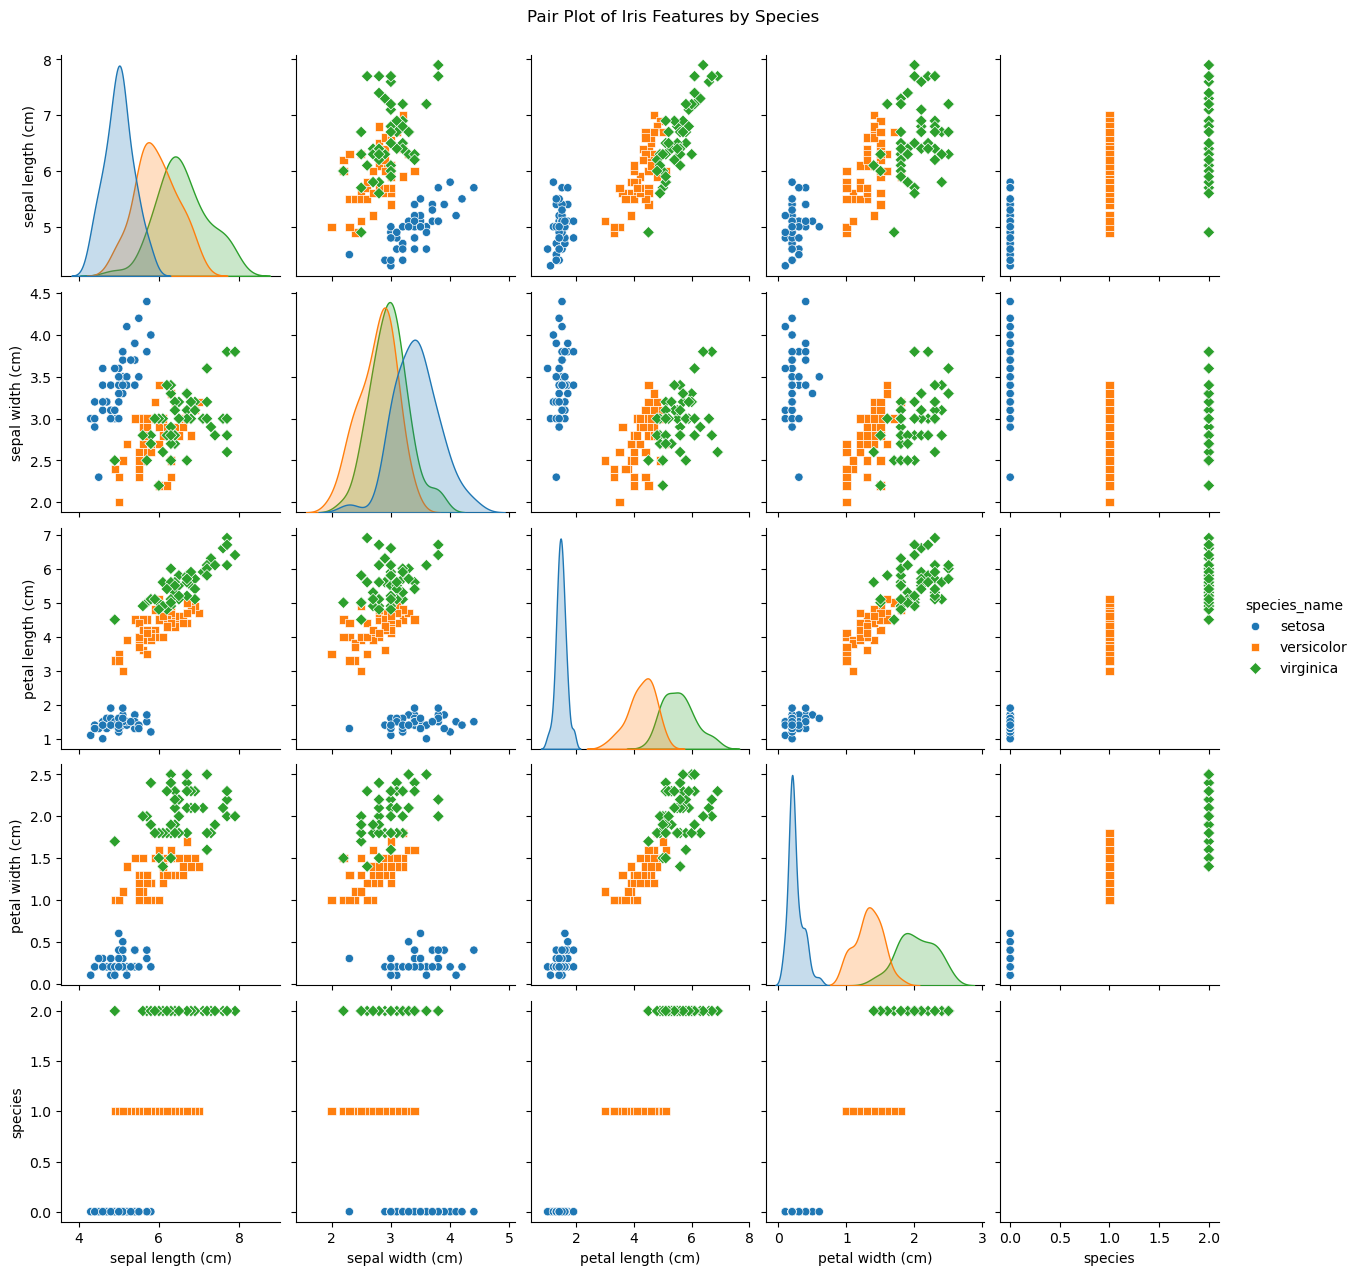

In [2]:
# 1. Load the dataset
# Load the Iris dataset directly from scikit-learn
iris = load_iris()

# Create a DataFrame for easier handling and visualization
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# Add the target species to the DataFrame
df['species'] = iris.target
# Map numerical target to species names for readability
df['species_name'] = df['species'].apply(lambda x: iris.target_names[x])

print("--- Dataset Head (First 5 Rows) ---")
print(df.head())
print("\n--- Dataset Information ---")
print(df.info())

# 2. Explore the dataset visually
print("\n--- Visual Exploration ---")
# Pairplot to visualize relationships between all features
# 'hue' colors the points by the 'species_name'
sns.pairplot(df, hue='species_name', markers=["o", "s", "D"])
plt.suptitle("Pair Plot of Iris Features by Species", y=1.02)
plt.show()

In [3]:
# 3. Define features (X) and target (y)
X = iris.data    # Features: Sepal length, Sepal width, Petal length, Petal width
y = iris.target  # Target: Species (0: Setosa, 1: Versicolor, 2: Virginica)

# 4. Split the data into training and testing sets
# We use a 70% train / 30% test split, with random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\nTraining set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")


Training set size: 105 samples
Testing set size: 45 samples



--- Training K-Nearest Neighbors Classifier (k=5) ---

--- Model Evaluation ---
Accuracy Score: 0.9778

Confusion Matrix:


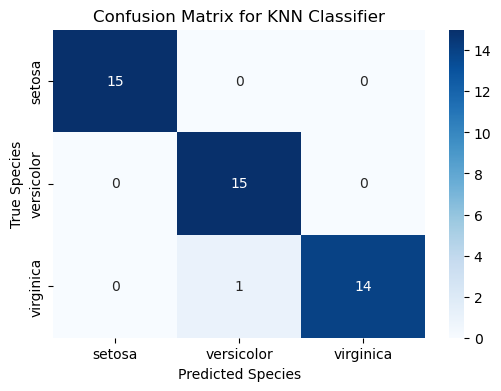


Classification Report (Precision, Recall, F1-Score):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45


--- Conclusion ---
The K-Nearest Neighbors model achieved an accuracy of 97.78% on the test data.


In [4]:
# 5. Preprocess if needed (Not needed for this clean dataset)
# The Iris dataset features are already numerical and scaled similarly, so
# standard scaling is often optional but a good practice for KNN.
# For simplicity and given the nature of the Iris data, we'll skip scaling here.
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# 6. Train a simple classifier (K-Nearest Neighbors)
# Choose k=5 as a common starting point
knn = KNeighborsClassifier(n_neighbors=5)

print("\n--- Training K-Nearest Neighbors Classifier (k=5) ---")
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# 7. Evaluate with accuracy, precision, and confusion matrix
print("\n--- Model Evaluation ---")

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
# Use a heatmap for better visualization of the matrix
plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d", # 'd' is for integer values
    cmap="Blues",
    xticklabels=iris.target_names,
    yticklabels=iris.target_names
)
plt.xlabel('Predicted Species')
plt.ylabel('True Species')
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

# Generate Classification Report (Includes Precision, Recall, F1-Score)
# Target names are provided for clearer output
report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("\nClassification Report (Precision, Recall, F1-Score):")
print(report)

print("\n--- Conclusion ---")
print(f"The K-Nearest Neighbors model achieved an accuracy of {accuracy*100:.2f}% on the test data.")